To process the csv file written by Force_chains_2 program

In [10]:
import pandas as pd
import networkx as nx
from writeNodesEdges import writeObjects
import math

data = pd.read_csv('../liggghtsResult/fabricated/forceChains.csv')

id=[i for i in data.LiggghtsId]
chain_ID=[i for i in data.chainId]
radius=[i for i in data.radius]
xyz=[[data.X[i],data.Y[i],data.Z[i]] for i in range(1+data.last_valid_index())] 

linkNodes=[i for i in data.linkNodes]
edge_info=[]
for i in range(1+data.last_valid_index()):
    nodes=linkNodes[i].split(",")
    for j in nodes:
        if j=='starting':
            continue
        node=int(j)
        if (node>0):      # 0 means the node is the starting point, and a negative integer means it was part of another chain of length 2 with the mod(int) representing the id of the other chain-particle                    
            node_index=id.index(node)
            if (math.dist(xyz[i],xyz[node_index])<=radius[i]+radius[node_index]):
                edge_info.append([node_index,i])

max_comp_stress= [i for i in data.minorStress]


writeObjects(xyz, edges=edge_info, nodeLabel=id,scalar=max_comp_stress,
name="max_comp_stress",scalar2=chain_ID,name2="chain_ID",fileout="forceChains_peters")


For batch processing

In [3]:
import pandas as pd
import networkx as nx
from writeNodesEdges import writeObjects
import math



path='../liggghtsResult/batch_shear_2d/alpha_pi/'
start= 0   # excludes the first one
last= 1000000
step= 50000

num_intervals=int((last-start)/step)



for k in range(num_intervals+1):
    prefix= path+ 'forceChains_'+ str(start+k*step)
    fileName= prefix+ '.csv'
    data = pd.read_csv(fileName) 

    id=[i for i in data.LiggghtsId]
    chain_ID=[i for i in data.chainId]
    radius=[i for i in data.radius]
    xyz=[[data.X[i],data.Y[i],data.Z[i]] for i in range(1+data.last_valid_index())] 

    linkNodes=[i for i in data.linkNodes]
    edge_info=[]
    for i in range(1+data.last_valid_index()):
        nodes=linkNodes[i].split(",")
        for j in nodes:
            if j=='starting':
                continue
            node=int(j)
            if (node>0):      # 0 means the node is the starting point, and a negative integer means it was part of another chain of length 2 with the mod(int) representing the id of the other chain-particle                    
                node_index=id.index(node)
                if (math.dist(xyz[i],xyz[node_index])<=radius[i]+radius[node_index]):
                    edge_info.append([node_index,i])

    max_comp_stress= [i for i in data.minorStress]

    writeObjects(xyz, edges=edge_info, nodeLabel=id,scalar=max_comp_stress,
    name="max_comp_stress",scalar2=chain_ID,name2="chain_ID",fileout=prefix)






Chain Statistics

In [6]:
import pandas as pd
import networkx as nx
from writeNodesEdges import writeObjects
import math



path='../liggghtsResult_1/batch_compression/alpha_pi/'
start= 500   # excludes the first one
last= 2500
step= 500

num_intervals=int((last-start)/step)



for k in range(num_intervals+1):
    prefix= path+ 'forceChains_'+ str(start+k*step)
    fileName= prefix+ '.csv'
    data = pd.read_csv(fileName) 

    id=[i for i in data.LiggghtsId]
    chain_ID=[i for i in data.chainId]
    radius=[i for i in data.radius]
    xyz=[[data.X[i],data.Y[i],data.Z[i]] for i in range(1+data.last_valid_index())] 

    #Finding the number of particles belonging to each chain_ID

    linkNodes=[i for i in data.linkNodes]
    edge_info=[]
    for i in range(1+data.last_valid_index()):
        nodes=linkNodes[i].split(",")
        for j in nodes:
            if j=='starting':
                continue
            node=int(j)
            if (node>0):      # 0 means the node is the starting point, and a negative integer means it was part of another chain of length 2 with the mod(int) representing the id of the other chain-particle                    
                node_index=id.index(node)
                if (math.dist(xyz[i],xyz[node_index])<=radius[i]+radius[node_index]):
                    edge_info.append([node_index,i])

    max_comp_stress= [i for i in data.minorStress]



NameError: name 'chain_Id' is not defined

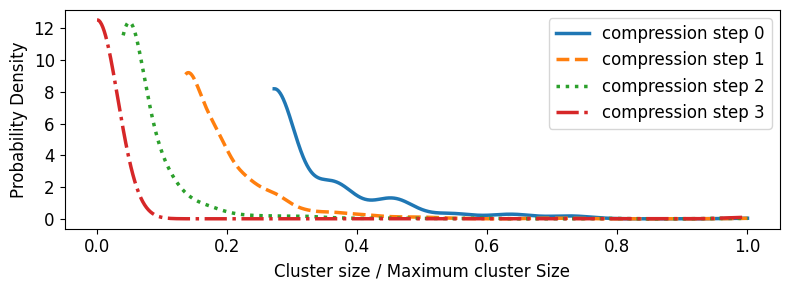

In [27]:
import pandas as pd
import networkx as nx
from writeNodesEdges import writeObjects
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

path='../liggghtsResult_1/batch_compression/alpha_pi/'
start= 500   # excludes the first one
last= 2000
step= 500

num_intervals=int((last-start)/step)
linestyles=['-','--',':','-.']
fig = plt.figure(figsize=(8, 3))

for k in range(num_intervals+1):
    prefix= path+ 'forceChains_'+ str(start+k*step)
    fileName= prefix+ '.csv'
    data = pd.read_csv(fileName) 
    chain_ID=[i for i in data.chainId]

    sorted_ch_ID=chain_ID
    sorted_ch_ID.sort()
    max_chain_ID= sorted_ch_ID[len(sorted_ch_ID)-1]
    count_of_chains=np.ones(max_chain_ID+1)
    j=0
    for i in range(len(sorted_ch_ID)-1):
        if sorted_ch_ID[i]==sorted_ch_ID[i+1]:
            count_of_chains[j]=count_of_chains[j]+1
        else:
            j=j+1

    norm_count_of_chains=count_of_chains/max(count_of_chains)
    # Estimate the probability density function (PDF)
    kde = gaussian_kde(norm_count_of_chains)

    # Generate x-values for the PDF plot
    x_values = np.linspace(norm_count_of_chains.min(), norm_count_of_chains.max(), 1000)

    # Compute the corresponding PDF values
    pdf_values = kde(x_values)

    # Plot the PDF
    plt.plot(x_values, pdf_values, linestyle=linestyles[k], label='compression step '+ str(k), linewidth=2.5)

# Add labels and title
plt.xlabel('Cluster size / Maximum cluster Size',fontsize=12)
plt.ylabel('Probability Density',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('Probability Distribution Function')

# Display the plot
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig("chain_PDF.tiff",dpi=1500)
plt.show()
    

#bins = 8
#plt.hist(angles, bins=bins)
#plt.ylabel('')
#plt.xlabel('Angle (Degree)')
#plt.xticks(np.arange(0,181,step=180/bins));
#plt.xlim(xmin=0,xmax=180);

#plt.hist(count_of_chains, bins=100)

# Add labels and title
#plt.xlabel('Value')
#plt.ylabel('Frequency')
#plt.title('Histogram of Array')

# Display the histogram
#plt.show()



In [21]:
plt.savefig("chain_PDF.tiff",dpi=1500)

<Figure size 640x480 with 0 Axes>